# Processing Big Data - Data profiling

© Explore Data Science Academy

## Honour Code
I {OLUSOJI, ONIGBINDE}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).
    Non-compliance with the honour code constitutes a material breach of contract.

## Context

Having completed the first step - data ingestion, the data now needs to be thoroughly prepared so that it is readable, reliable and robust. As the Data Engineer in the team, this will be your responsibility. The Data Scientists are looking to you to clean this data so that model development and deployment become seamless when the data is used in a production environment. Having completed your Data Engineering course recently, your manager Gnissecorp Atadgid, asks you to create data summaries and perform checks using the six dimensions of data quality.

<div align="center" style="width: 600px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://github.com/Explore-AI/Pictures/raw/master/data_engineering/transform/predict/DataQuality.jpg"
     alt="Data Quality"
     style="float: center; padding-bottom=0.5em"
     width=100%/>
     <p><em>Figure 1. Six dimensions of data quality</em></p>
</div>

## Import libraries
Below we import the libraries required to complete this section of the predict.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.types import *

Remember that we need a `SparkContext` and `SparkSession` to interface with Spark.
We will mostly be using the `SparkContext` to interact with RDDs 
and the `SparkSession` to interface with Python objects.

> ℹ️ **Instructions** ℹ️
>
>Initialise a new **Spark Context** and **Session** that you will use to interface with Spark.

In [2]:
#TODO: Write your code here.
sc = SparkContext()
spark = SparkSession(sc)

## Parquet files
In the previous section of the predict, you generated parquet files to your local directory. You will be making use of these files to continue with this section of the predict. Please make sure that your parquet files are specifically for the year **1962**. Any other year used outside of **1962** will produce incorrect answers and have a negative impact on your overall predict mark.

> ℹ️ **Instructions** ℹ️
>
> Read the parquet files stored in your directory for the year **1962** into a Spark DataFrame.

In [3]:
#TODO: Write your code here
year_1962_df = spark.read.parquet('transformed_data/')

In [4]:
#INSERTED (Inspect the dataframe alphabetically and cache it)
year_1962_df.orderBy('stock').show()
year_1962_df.cache()

+-------------------+--------+--------+--------+--------+---------+-------+-----+
|               date|    open|    high|     low|   close|adj_close| Volume|stock|
+-------------------+--------+--------+--------+--------+---------+-------+-----+
|1962-02-09 00:00:00| 5.86332|5.923395| 5.82327| 5.82327|1.3768599|33900.0|   AA|
|1962-09-07 00:00:00|5.955435|6.107625|5.907375|5.939415|1.4188904|42500.0|   AA|
|1962-02-19 00:00:00| 5.83929|5.907375| 5.83929| 5.86332|1.3863293|29900.0|   AA|
|1962-02-14 00:00:00| 5.83929| 5.83929|5.747175| 5.80725|1.3730713|56500.0|   AA|
|1962-02-26 00:00:00| 6.05556|6.107625|5.955435|6.107625|1.4440926|82500.0|   AA|
|1962-02-02 00:00:00|5.931405|5.955435|5.907375|5.915385|1.3915651|30500.0|   AA|
|1962-02-16 00:00:00|5.739165| 5.83128|5.739165| 5.83128|1.3787535|55900.0|   AA|
|1962-02-27 00:00:00|6.107625|6.123645|6.107625|6.107625|1.4440926|27900.0|   AA|
|1962-02-12 00:00:00| 5.82327| 5.83128| 5.81526| 5.81526|1.3749654|16600.0|   AA|
|1962-02-20 00:0

DataFrame[date: timestamp, open: float, high: float, low: float, close: float, adj_close: float, Volume: float, stock: string]

In [5]:
#INSERTED (To get start of dataframe. Take note of the date)
from pyspark.sql.functions import col
year_1962_df.sort(col('date').asc()).show(5)

+-------------------+----------+-----------+----------+----------+-----------+--------+-----+
|               date|      open|       high|       low|     close|  adj_close|  Volume|stock|
+-------------------+----------+-----------+----------+----------+-----------+--------+-----+
|1962-01-02 00:00:00|  6.532155|   6.556185|  6.532155|  6.532155|  1.5366576| 55900.0|   AA|
|1962-01-02 00:00:00|0.09290839|0.096026115|0.09290839|0.09290839|0.035517246|817400.0|  DIS|
|1962-01-02 00:00:00| 6.1258435|   6.160982| 6.1258435| 6.1258435|  1.4146507| 59700.0| ARNC|
|1962-01-02 00:00:00|0.83744854| 0.83744854|0.82304525|0.82304525|  0.1457476|352200.0|   BA|
|1962-01-02 00:00:00| 1.6041666|  1.6197916| 1.5885416| 1.6041666| 0.13695742|163200.0|  CAT|
+-------------------+----------+-----------+----------+----------+-----------+--------+-----+
only showing top 5 rows



In [6]:
#INSERTED (To get end of dataframe. Take note of the date)
from pyspark.sql.functions import col
year_1962_df.sort(col('date').desc()).show()

+-------------------+----------+----------+----------+----------+------------+---------+-----+
|               date|      open|      high|       low|     close|   adj_close|   Volume|stock|
+-------------------+----------+----------+----------+----------+------------+---------+-----+
|1962-12-31 00:00:00|       0.0| 1.8632812| 1.8515625|  1.859375|  0.01717616|1059200.0|  XOM|
|1962-12-31 00:00:00|       0.0| 1.1132812| 1.1035156| 1.1132812| 0.010735849| 256000.0|   PG|
|1962-12-31 00:00:00|0.08559335|0.08603684|0.08559335|0.08559335| 0.004747302|1127400.0|  HPQ|
|1962-12-31 00:00:00|       0.0|      8.25|   8.15625|   8.15625|   1.4585857|  30400.0|   GT|
|1962-12-31 00:00:00|       0.0|  0.171875|0.16956018|0.16956018| 4.827062E-7| 216000.0|  JNJ|
|1962-12-31 00:00:00|       0.0|   250.625|      null|    248.75|   116.69414|    600.0|  NAV|
|1962-12-31 00:00:00|       0.0|    31.625|    31.375|      31.5|   0.5463368|   1200.0|  DTE|
|1962-12-31 00:00:00| 0.0745013| 0.0745013|0.07129

## Metadata 

Metadata is data containing additional information about the data itself. In the cloud storage, there is a metadata file called [`symbols_valid_meta.csv`](https://processing-big-data-predict-stocks-data.s3.eu-west-1.amazonaws.com/symbols_valid_meta.csv) that is collocated with the stock market data. You will need to download this to use when performing your data quality checks.

> ℹ️ **Instructions** ℹ️
>
> Download the metadata from the S3 bucket and read it into a Spark DataFrame.

In [7]:
#TODO: Write your code here
meta_df = spark.read.csv('symbols_valid_meta.csv', header=True)
meta_df.show()

+-------------+------+--------------------+----------------+---------------+---+--------------+----------+----------------+----------+-------------+----------+
|Nasdaq Traded|Symbol|       Security Name|Listing Exchange|Market Category|ETF|Round Lot Size|Test Issue|Financial Status|CQS Symbol|NASDAQ Symbol|NextShares|
+-------------+------+--------------------+----------------+---------------+---+--------------+----------+----------------+----------+-------------+----------+
|            Y|     A|Agilent Technolog...|               N|               |  N|         100.0|         N|            null|         A|            A|         N|
|            Y|    AA|Alcoa Corporation...|               N|               |  N|         100.0|         N|            null|        AA|           AA|         N|
|            Y|  AAAU|Perth Mint Physic...|               P|               |  Y|         100.0|         N|            null|      AAAU|         AAAU|         N|
|            Y|  AACG|ATA Creativity Gl.

## Data Accuracy
Data accuracy is the degree to which data correctly describes a "real world" object or event.

It is important to do checks to determine the basic integrity of the dataset; do the values fall within expected ranges?

Most of the possible errors relating to data accuracy can occur at collection time. In our case, it is not possible to test the collection time accuracy, so we have to infer from ranges and summary statistics. Here you need to look closely at each field to see if its values make sense, with no strange surprises.

In assessing accuracy, it is important to look into precision as well. Do you need seven decimals, or will one or two suffice?

- **Measured by**: The degree to which the data mirrors the characteristics of the real-world object or objects it represents;
- **Units**: The percentage of data entries that pass the data accuracy rules;
- **Related to**: Validity, Uniqueness, Consistency.

> ℹ️ **Instructions** ℹ️
>
> Generate summary statistics to explore your data. Make sure you understand the ranges, means, extremums, and deviations found in the data set.

In [8]:
#TODO: Write your code high
year_1962_df.summary().show()

+-------+------------------+------------------+------------------+-----------------+-----------------+-----------------+-----+
|summary|              open|              high|               low|            close|        adj_close|           Volume|stock|
+-------+------------------+------------------+------------------+-----------------+-----------------+-----------------+-----+
|  count|              5106|              5106|              5064|             5106|             5085|             5085| 5106|
|   mean|1.0904873526012002|16.757624946793637|15.728619917198033|16.64199179044607|5.986642513535306|540930.2458210423| null|
| stddev|  2.36445352530491| 53.91407348193546| 51.32292289814399|53.54677139900802|24.64637054715319|864596.2440525505| null|
|    min|               0.0|               0.0|       0.052377883|      0.053624976|     4.0381454E-7|              0.0|   AA|
|    25%|               0.0|         0.2454427|        0.24348958|       0.24739583|      0.006592116|         

> ℹ️ **Instructions** ℹ️
>
> Generate histograms for the six numerical attributes found in the data to understand the distribution of values.
>
>*You may use as many coding cells as necessary.*

In [9]:
#INSERTED (Select the numerical columns within our datafrme for our Histogram)
year_1962_df_stat = year_1962_df.select('open', 'high', 'low', 'close', 'adj_close', 'volume')
year_1962_df_stat.toPandas().head()

,open,high,low,close,adj_close,volume
0,5.839290,5.907375,5.839290,5.863320,1.386329,29900.0
1,5.481634,5.528486,5.481634,5.516773,1.280453,32000.0
2,0.907407,0.915638,0.899177,0.903292,0.161415,619400.0
3,1.677083,1.692708,1.661458,1.677083,0.144059,170400.0
4,0.000000,3.578869,20.000000,3.549107,0.056501,273600.0


array([[<AxesSubplot:title={'center':'open'}>,
        <AxesSubplot:title={'center':'high'}>],
       [<AxesSubplot:title={'center':'low'}>,
        <AxesSubplot:title={'center':'close'}>],
       [<AxesSubplot:title={'center':'adj_close'}>,
        <AxesSubplot:title={'center':'volume'}>]], dtype=object)

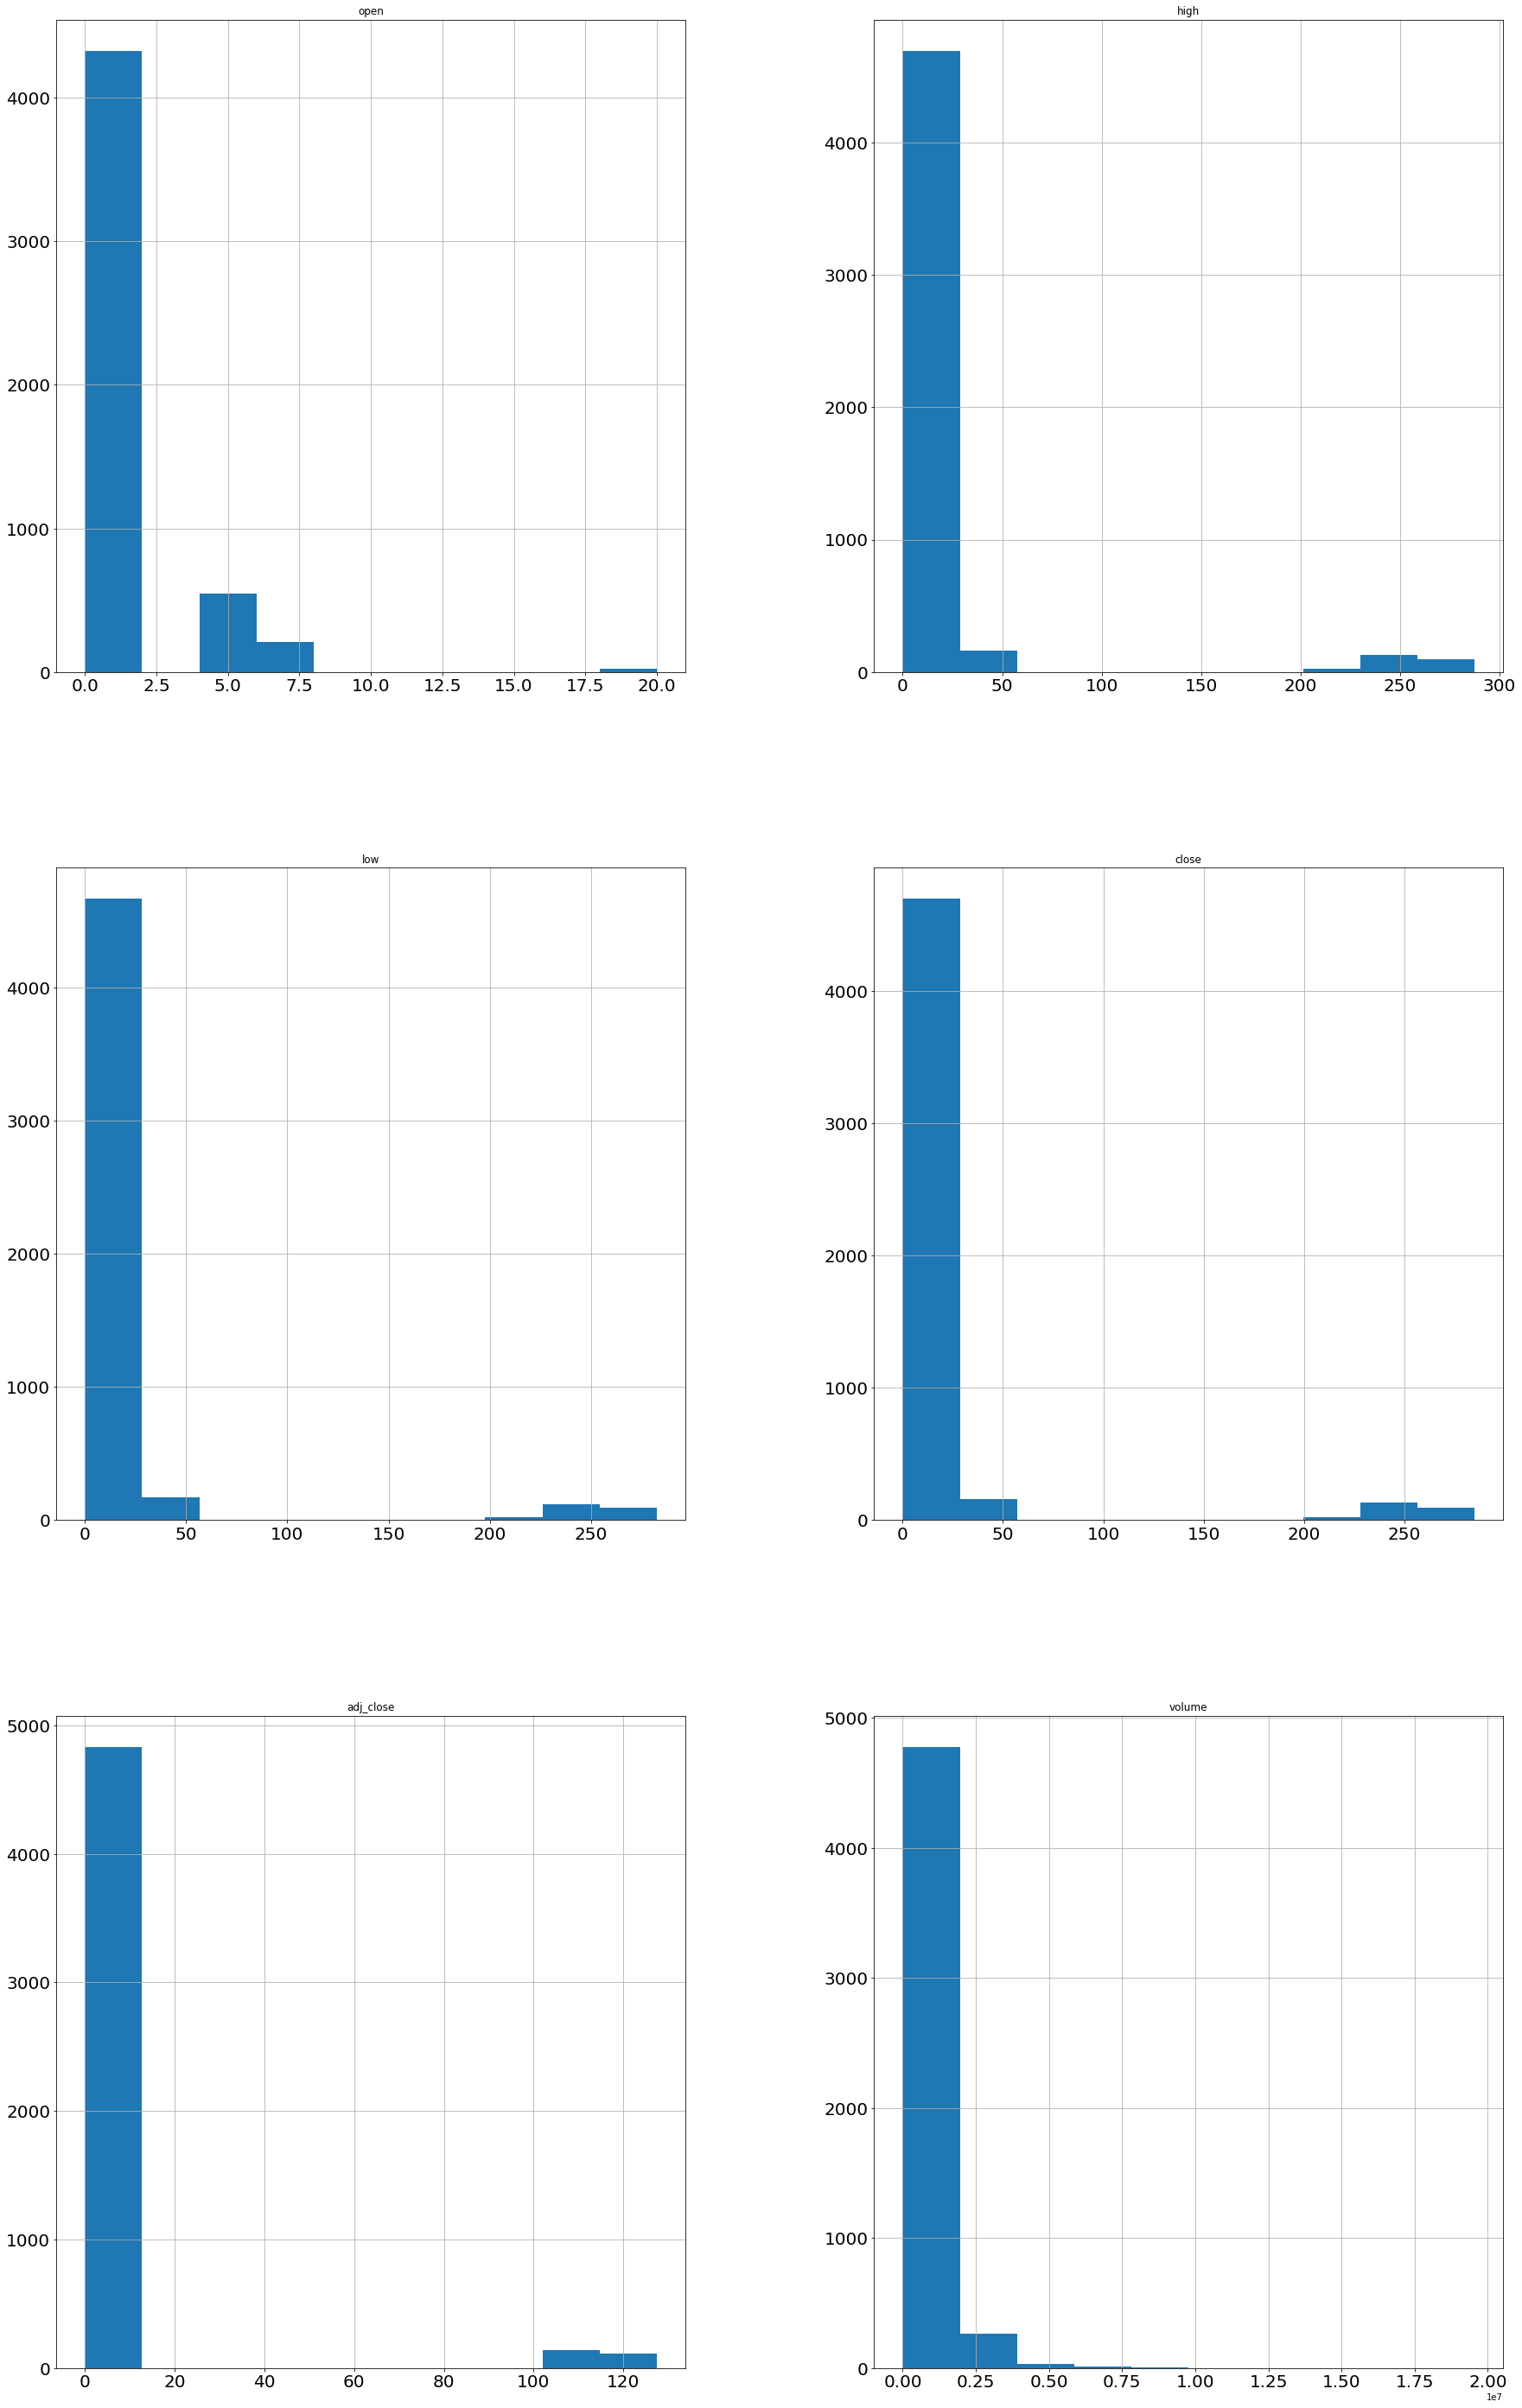

In [10]:
#TODO: Write your code here (Bigger view of Histogram)
year_1962_df_hist = year_1962_df_stat.toPandas()
year_1962_df_hist.hist(bins=10, xlabelsize=(20), ylabelsize=(20), figsize=(30, 50), grid=(True))

<Figure size 720x576 with 0 Axes>

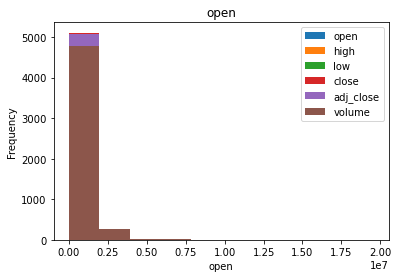

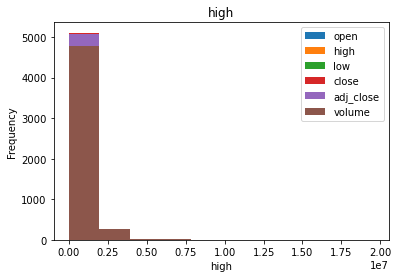

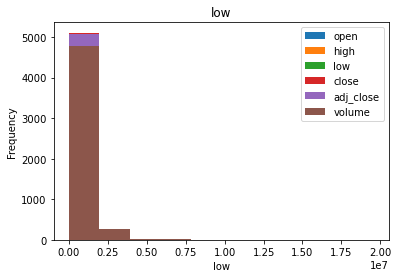

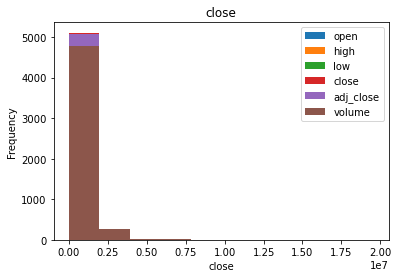

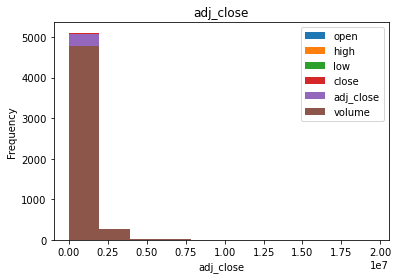

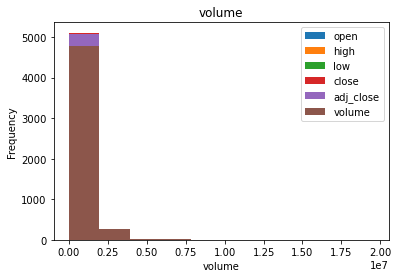

In [11]:
#INSERTED (Smaller view but bigger labels)
year_1962_df_hist = year_1962_df_stat.toPandas()

num_cols=['open', 'high', 'low', 'close','adj_close', 'volume']
fig = plt.figure(figsize=(10, 8))
for col in num_cols:
    x=year_1962_df_hist
    x.plot(kind='hist')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(col)
    plt.show()

> ℹ️ **Instructions** ℹ️
>
> Investigate the **open** column to identify stocks that have open values greater than 2, and note any anomalies that you find in the data.
>
>*You may use as many coding cells as necessary.*

In [12]:
#INSERTED (Creating temporary view)
year_1962_df.createOrReplaceTempView('year_1962_df_tbl')

In [13]:
#INSERTED (Counting 'open' column values)
spark.sql("""SELECT stock, COUNT(open) as Overall
          FROM year_1962_df_tbl 
          GROUP BY stock
          ORDER BY Overall desc""").show()

+-----+-------+
|stock|Overall|
+-----+-------+
|  HPQ|    309|
|   ED|    271|
|   PG|    252|
|  XOM|    252|
|  DTE|    252|
|   GT|    252|
|   FL|    252|
|   MO|    252|
|   AA|    252|
|  CVX|    252|
|   GE|    252|
|  CAT|    252|
|   IP|    252|
|  NAV|    252|
|   KO|    252|
|  IBM|    252|
|  JNJ|    252|
|  DIS|    252|
|   BA|    242|
| ARNC|    231|
+-----+-------+
only showing top 20 rows



In [14]:
#TODO: Write your code here (show open column values greater than 2 ordered by stock)
spark.sql("""SELECT stock, open
          FROM year_1962_df_tbl 
          WHERE open > 2
          ORDER BY stock 
          """).show()

+-----+--------+
|stock|    open|
+-----+--------+
|   AA|5.939415|
|   AA|6.155685|
|   AA|5.138415|
|   AA|6.339915|
|   AA|5.322645|
|   AA| 5.42277|
|   AA|  6.0075|
|   AA|5.346675|
|   AA|5.330655|
|   AA|4.906125|
|   AA| 5.24655|
|   AA| 6.23979|
|   AA| 5.03829|
|   AA| 5.64705|
|   AA| 6.63228|
|   AA|6.331905|
|   AA|6.347925|
|   AA|  5.2065|
|   AA| 6.04755|
|   AA| 5.43078|
+-----+--------+
only showing top 20 rows



In [15]:
#INSERTED (Show the largest open value per stock in the dataframe)
year_1962_df.groupBy('stock').agg(F.max('open')).orderBy('max(open)').show()


+-----+-----------+
|stock|  max(open)|
+-----+-----------+
|  XOM|        0.0|
|  CVX|        0.0|
|  DTE|        0.0|
|   MO|        0.0|
|   IP|        0.0|
|   FL|        0.0|
|  JNJ|        0.0|
|   ED|        0.0|
|  NAV|        0.0|
|   GT|        0.0|
|  DIS|0.099767394|
|  HPQ|  0.1312727|
|   KO| 0.26302084|
|   GE|   0.785006|
|   BA|  0.9238683|
|  CAT|       1.75|
|ARNCA|   5.387931|
| ARNC|   6.360101|
|   AA|   6.764445|
|  IBM|   7.713333|
+-----+-----------+
only showing top 20 rows



 ## 📔️**Notes** 📔️

 *Use this cell to note down any potential findings.*

 1. In the open column, the data contains outliers.

 2. The normal range of the data in the open column is between 0.0 - 2.0
   
 3. IBM. AA, ARNC and ARNCA have the most number of extreme values.
 

> ℹ️ **Instructions** ℹ️
>
> Investigate **high**, **low**, **close**, and **adj_close** to determine if any stocks may be deviating from the normal ranges of the data set. Note down the stock(s) that you come across.
>
>*You may use as many coding cells as necessary.*

In [16]:
#INSERTED (showing all stocks and their high, low, close and adj_close numerical columns)
spark.sql("""SELECT stock, high, low, close, adj_close
            FROM year_1962_df_tbl""").show(5)

+-----+----------+----------+---------+-----------+
|stock|      high|       low|    close|  adj_close|
+-----+----------+----------+---------+-----------+
|   AA|  5.907375|   5.83929|  5.86332|  1.3863293|
| ARNC|  5.528486|  5.481634|5.5167727|  1.2804527|
|   BA|0.91563785|0.89917696|0.9032922| 0.16141544|
|  CAT| 1.6927084| 1.6614584|1.6770834|  0.1440587|
|  CVX|  3.578869|      20.0| 3.549107|0.056501225|
+-----+----------+----------+---------+-----------+
only showing top 5 rows



In [17]:
#INSERTED (list all values that are above average for high, low, close and adj_close columns)
mean_high = 16.757624946793637
high_vals =year_1962_df.filter(year_1962_df.high>mean_high).select('high','stock').orderBy('high').show(2)

mean_low = 15.728619917198033
low_vals =year_1962_df.filter(year_1962_df.low>mean_low).select('low','stock').orderBy('low').show(2)

mean_close = 16.64199179044607
close_vals =year_1962_df.filter(year_1962_df.close>mean_close).select('close','stock').orderBy('close').show(2)

mean_adj_close = 5.986642513535306
low_vals =year_1962_df.filter(year_1962_df.adj_close>mean_adj_close).select('adj_close','stock').orderBy('adj_close').show(2)

+-------+-----+
|   high|stock|
+-------+-----+
|   24.5|  DTE|
|24.8125|  DTE|
+-------+-----+
only showing top 2 rows

+----+-----+
| low|stock|
+----+-----+
|20.0|  CVX|
|20.0|  CVX|
+----+-----+
only showing top 2 rows

+------+-----+
| close|stock|
+------+-----+
|24.375|  DTE|
|24.375|  DTE|
+------+-----+
only showing top 2 rows

+---------+-----+
|adj_close|stock|
+---------+-----+
|101.66623|  NAV|
|102.06989|  NAV|
+---------+-----+
only showing top 2 rows



In [18]:
#INSERTED (count values per stock that are above average for high, low, close and adj_close columns)

for column in ['high']:
    print(f'values in {column} higher than mean high value per stock')
    year_1962_df.select('stock', column).filter(year_1962_df[column] > mean_high).groupBy('stock').count().show() 
    
    
for column in ['low']:
    print(f'values in {column} higher than mean low value per stock')
    year_1962_df.select('stock', column).filter(year_1962_df[column] > mean_low).groupBy('stock').count().show() 
    
for column in ['close']:
    print(f'values in {column} higher than mean close value per stock')
    year_1962_df.select('stock', column).filter(year_1962_df[column] > mean_close).groupBy('stock').count().show() 
    
    
for column in ['adj_close']:
    print(f'values in {column} higher than mean adj_close value per stock')
    year_1962_df.select('stock', column).filter(year_1962_df[column] > mean_adj_close).groupBy('stock').count().show() 

values in high higher than mean high value per stock
+-----+-----+
|stock|count|
+-----+-----+
|  DTE|  252|
|  NAV|  252|
+-----+-----+

values in low higher than mean low value per stock
+-----+-----+
|stock|count|
+-----+-----+
|  CVX|   19|
|  DTE|  252|
|  NAV|  232|
+-----+-----+

values in close higher than mean close value per stock
+-----+-----+
|stock|count|
+-----+-----+
|  DTE|  252|
|  NAV|  252|
+-----+-----+

values in adj_close higher than mean adj_close value per stock
+-----+-----+
|stock|count|
+-----+-----+
|  NAV|  252|
+-----+-----+



In [19]:
#TODO: Write your code here (get the extremely high values for high, low, close and adj_close columns )

spark.sql("""SELECT stock, MAX(high)
          FROM year_1962_df_tbl 
          WHERE high > 16.757624946793637
          GROUP BY stock 
          ORDER BY MAX(high) DESC""").show()


spark.sql("""SELECT stock, MAX(low)
          FROM year_1962_df_tbl
          WHERE low > 15.728619917198033
          GROUP BY stock
          ORDER BY MAX(low) DESC""").show()

spark.sql("""SELECT stock, MAX(close)
          FROM year_1962_df_tbl 
          WHERE close > 16.64199179044607
          GROUP BY stock
          ORDER BY MAX(close) DESC""").show()


spark.sql("""SELECT stock, MAX(adj_close)
          FROM year_1962_df_tbl 
          WHERE adj_close > 5.986642513535306
          GROUP BY stock
          ORDER BY MAX(adj_close) DESC""").show()

+-----+---------+
|stock|max(high)|
+-----+---------+
|  NAV|    287.5|
|  DTE|   31.875|
+-----+---------+

+-----+--------+
|stock|max(low)|
+-----+--------+
|  NAV|   282.5|
|  DTE|    31.5|
|  CVX|    20.0|
+-----+--------+

+-----+----------+
|stock|max(close)|
+-----+----------+
|  NAV|     285.0|
|  DTE|   31.8125|
+-----+----------+

+-----+--------------+
|stock|max(adj_close)|
+-----+--------------+
|  NAV|     127.45936|
+-----+--------------+



 ## 📔️**Notes** 📔️

 *Use this cell to note down any potential findings.*

 1. Although the mean values (averages) are not the true values, they give us an idea of the entries that are outliers within our dataset.
 2. The high column contains some values that are above normal (with NAV and DTE stocks registering a MAX of 287.5 and 31.875 respectively.
 3. The low column has extreme values ranging between 20 - 282.5. These values are distributed across NAV, DTE, and CVX stocks.
 4. The close column has extreme values ranging from 31.8125 - 282.5. The stocks affected are NAV and DTE.
 5. NAV is affected by extreme values in 4 columns, high, low, close and adj_close.



## Completeness

Completeness is the proportion of stored data against the potential of “100% complete". This is the degree to which the required data is in the dataset. 

Does the dataset have missing values, or if it is time-series data, does it have time period gaps? Has a bias been introduced that may change your assumptions or affect your results?

Completeness issues can occur at the row level (gaps within the dataset) or the field level (one entry missing). At the field level, entire fields can being empty, or >80% of a field's data missing. 

Another issue that may occur is default values. A typical example of this is where a logger sends back a 0 instead of a null value, which can greatly skew any attempts at modelling. This is where it is instrumental to employ domain knowledge when assessing a dataset. 

- **Measured by**: A measure of the absence of blank (null) values or the presence of non-blank values;
- **Units**: Percentage;
- **Related to**: Validity and Accuracy.

### Missing values

> ℹ️ **Instructions** ℹ️
>
> Write code to identify and count the number of missing values (nulls) in the dataset. Include a percentage to describe the proportion of missing values per column. Output the results in the following manner:
>
> `There are <number_of_missing_values> (<percentage>) null values in <column_name> column`
>
>*You may use as many coding cells as necessary.*

In [20]:
# INSERTED (count null values per column)
from pyspark.sql.functions import col, when, count

total_count = year_1962_df_stat.select([count(c).alias(c) for c in year_1962_df_stat.columns])
total_count.show()

null_count = year_1962_df_stat.select([(count(when(col(c).isNull(), c)).alias(c)) for c in year_1962_df_stat.columns])
null_count.show()

+----+----+----+-----+---------+------+
|open|high| low|close|adj_close|volume|
+----+----+----+-----+---------+------+
|5106|5106|5064| 5106|     5085|  5085|
+----+----+----+-----+---------+------+

+----+----+---+-----+---------+------+
|open|high|low|close|adj_close|volume|
+----+----+---+-----+---------+------+
|   0|   0| 42|    0|       21|    21|
+----+----+---+-----+---------+------+



In [21]:
#TODO: Write your code here

for column in year_1962_df_stat.columns:  
    count = year_1962_df_stat.where(year_1962_df_stat[column].isNull()).count() 
    total_count = year_1962_df_stat.select(year_1962_df_stat[column]).count() 
    print(f'There are {count} ({round(count/total_count*100, 16)}%) null values in {column} column')


There are 0 (0.0%) null values in open column
There are 0 (0.0%) null values in high column
There are 42 (0.8225616921269095%) null values in low column
There are 0 (0.0%) null values in close column
There are 21 (0.4112808460634548%) null values in adj_close column
There are 21 (0.4112808460634548%) null values in volume column


### Columns with missing values


> ℹ️ **Instructions** ℹ️
>
> From the above result, probe the columns that are affected by the missing data to find out which stocks were affected.
>
>*You may use as many coding cells as necessary.*

In [22]:
#TODO: Write your code here
for column in ['open', 'high', 'low', 'close', 'adj_close','volume']:
    print(f'Missing values in {column} based on stock')
    year_1962_df.select('stock', column).filter(year_1962_df[column].isNull()).groupBy('stock').count().show()

Missing values in open based on stock
+-----+-----+
|stock|count|
+-----+-----+
+-----+-----+

Missing values in high based on stock
+-----+-----+
|stock|count|
+-----+-----+
+-----+-----+

Missing values in low based on stock
+-----+-----+
|stock|count|
+-----+-----+
|  CAT|   22|
|  NAV|   20|
+-----+-----+

Missing values in close based on stock
+-----+-----+
|stock|count|
+-----+-----+
+-----+-----+

Missing values in adj_close based on stock
+-----+-----+
|stock|count|
+-----+-----+
|   FL|   21|
+-----+-----+

Missing values in volume based on stock
+-----+-----+
|stock|count|
+-----+-----+
|  JNJ|   21|
+-----+-----+



In [23]:
#INSERTED (Display rows having null values in the low column)
year_1962_df.filter(year_1962_df['low'].isNull()).show(42)

+-------------------+---------+---------+----+---------+----------+--------+-----+
|               date|     open|     high| low|    close| adj_close|  Volume|stock|
+-------------------+---------+---------+----+---------+----------+--------+-----+
|1962-12-03 00:00:00|      0.0|    247.5|null|    247.5|  114.7004|   500.0|  NAV|
|1962-12-20 00:00:00|      0.0|   241.25|null|  239.375|112.296135|   600.0|  NAV|
|1962-12-21 00:00:00|      0.0|  243.125|null|    242.5| 113.76213|   500.0|  NAV|
|1962-03-20 00:00:00|1.6666666|1.6979166|null|1.6979166|0.14584826|177600.0|  CAT|
|1962-03-14 00:00:00|1.6302084|1.6614584|null|1.6614584|0.14271663|117600.0|  CAT|
|1962-12-31 00:00:00|      0.0|  250.625|null|   248.75| 116.69414|   600.0|  NAV|
|1962-12-28 00:00:00|      0.0|  249.375|null|  248.125| 116.40094|   300.0|  NAV|
|1962-03-22 00:00:00|1.6666666|1.6927084|null|1.6822916|0.14450607|268800.0|  CAT|
|1962-12-18 00:00:00|      0.0|   238.75|null|   236.25|  110.8301|   900.0|  NAV|
|196

In [24]:
#INSERTED (Display rows having null values in the adj_close column)
year_1962_df.filter(year_1962_df['adj_close'].isNull()).show(21)

+-------------------+----+---------+---------+---------+---------+--------+-----+
|               date|open|     high|      low|    close|adj_close|  Volume|stock|
+-------------------+----+---------+---------+---------+---------+--------+-----+
|1962-06-12 00:00:00| 0.0|5.6666665|5.6041665|5.6041665|     null| 50400.0|   FL|
|1962-06-06 00:00:00| 0.0|    5.875|  5.65625|5.8333335|     null|109200.0|   FL|
|1962-06-07 00:00:00| 0.0|  5.84375|5.7291665|5.7291665|     null| 36000.0|   FL|
|1962-06-18 00:00:00| 0.0|5.6666665|      5.5|   5.5625|     null| 42000.0|   FL|
|1962-06-15 00:00:00| 0.0|5.6666665|5.4583335|5.6666665|     null| 64800.0|   FL|
|1962-06-22 00:00:00| 0.0|5.3645835|5.2916665|5.2916665|     null| 67200.0|   FL|
|1962-06-19 00:00:00| 0.0|      5.5|5.4791665|5.4791665|     null| 19200.0|   FL|
|1962-06-21 00:00:00| 0.0|  5.46875|5.4166665|5.4166665|     null| 49200.0|   FL|
|1962-06-20 00:00:00| 0.0|  5.53125|5.4583335|5.4583335|     null| 34800.0|   FL|
|1962-06-01 00:0

In [25]:
#INSERTED (Display rows having null values in the volume column)
year_1962_df.filter(year_1962_df['volume'].isNull()).show(21)

+-------------------+----+----------+----------+----------+------------+------+-----+
|               date|open|      high|       low|     close|   adj_close|Volume|stock|
+-------------------+----+----------+----------+----------+------------+------+-----+
|1962-07-20 00:00:00| 0.0| 0.1730324| 0.1724537| 0.1724537| 4.874888E-7|  null|  JNJ|
|1962-07-25 00:00:00| 0.0| 0.1724537|0.16435185|0.16435185|4.6458675E-7|  null|  JNJ|
|1962-07-03 00:00:00| 0.0|0.18171297|0.17824075|0.18171297| 5.136628E-7|  null|  JNJ|
|1962-07-09 00:00:00| 0.0|0.17708333|0.17708333|0.17708333|5.0057577E-7|  null|  JNJ|
|1962-07-17 00:00:00| 0.0|0.17766203|0.17766203|0.17766203| 5.022119E-7|  null|  JNJ|
|1962-07-18 00:00:00| 0.0|0.17534722|0.17418982|0.17418982| 4.923964E-7|  null|  JNJ|
|1962-07-27 00:00:00| 0.0| 0.1701389|0.16898148|0.16956018|4.7930956E-7|  null|  JNJ|
|1962-07-31 00:00:00| 0.0|0.17274305| 0.1712963|0.17274305| 4.883069E-7|  null|  JNJ|
|1962-07-02 00:00:00| 0.0|0.18229167|0.17650463|0.1822

#### Fix Completeness

How do we deal with incomplete data?
- Dropping missing values
- Discard the incomplete column
- Discard the rows containing missing data
- Case deletion

> ℹ️ **Instructions** ℹ️
>
> Use the appropriate strategy to remedy the missing data. 
>
>*You may use as many coding cells as necessary.*

In [26]:
#TODO: Write your code here
year_1962_df = year_1962_df.na.drop()

In [27]:
#INSERTED (confirm rows with null values have been dropped)
for column in ['low', 'adj_close','volume']:
    print(f'Missing values in {column} per stock')
    year_1962_df.select('stock', column).filter(year_1962_df[column].isNull()).groupBy('stock').count().show()  

Missing values in low per stock
+-----+-----+
|stock|count|
+-----+-----+
+-----+-----+

Missing values in adj_close per stock
+-----+-----+
|stock|count|
+-----+-----+
+-----+-----+

Missing values in volume per stock
+-----+-----+
|stock|count|
+-----+-----+
+-----+-----+



### Zero Values

Take a deeper look into the entries with many zero values.

#### Fix Completeness

Completeness issues can be fixed through imputation of the missing data through:
- imputation by mean/mode/median;
- regression; or
- KNN.
 
> ℹ️ **Instructions** ℹ️
>
> Write code to identify and count the number of zeros (0) in the dataset. Include a percentage to describe the proportion of missing values per column. Output the results in the following manner:
>
> `There are <number_of_zeros> (<percentage>) zero values in <column_name> column`
>
>*You may use as many coding cells as necessary.*

In [28]:
#TODO: Write your code here (Find percentage of zero values in each of the 6 columns)
num_cols = ('open', 'high', 'low', 'close', 'adj_close', 'volume')

year_1962_df_no_zero = year_1962_df_stat.select([F.count(F.when(year_1962_df_stat[c] == 0, c)).alias(c) for c in num_cols])

for column in num_cols:
    print(f'There are {year_1962_df_no_zero.select(column).collect()[0][0]}\
 ({round(year_1962_df_no_zero.select(column).collect()[0][0]/year_1962_df_stat.select(column).count()*100, 2)}%)\
 zero values in {column} column')
    

There are 2768 (54.21%) zero values in open column
There are 20 (0.39%) zero values in high column
There are 0 (0.0%) zero values in low column
There are 0 (0.0%) zero values in close column
There are 0 (0.0%) zero values in adj_close column
There are 27 (0.53%) zero values in volume column


In [29]:
#INSERTED (Count the number of zeros in each of the numerical columns)
year_1962_df_no_zero.show()

+----+----+---+-----+---------+------+
|open|high|low|close|adj_close|volume|
+----+----+---+-----+---------+------+
|2768|  20|  0|    0|        0|    27|
+----+----+---+-----+---------+------+



From the above section, you find that there are a few columns that contain zero values. However, some of these are true zeros and are explainable. Your task is to distinguish which column should undergo data imputation.

> ℹ️ **Instructions** ℹ️
>
> Investigate the columns with zero values and determine which one should undergo data imputation. Take note of the stock and month on which zero values occurred.
>
>*You may use as many coding cells as necessary.*

In [30]:
#TODO: Write your code here (Display rows having zero values in the open column)
year_1962_df.filter('open==0').orderBy('stock','date').show()

+-------------------+----+---------+---------+---------+-----------+--------+-----+
|               date|open|     high|      low|    close|  adj_close|  Volume|stock|
+-------------------+----+---------+---------+---------+-----------+--------+-----+
|1962-01-02 00:00:00| 0.0| 3.296131|3.2440476| 3.296131|0.051992513|105600.0|  CVX|
|1962-01-03 00:00:00| 0.0|3.3035715|3.2738094|3.2886906|0.051875107|126400.0|  CVX|
|1962-01-04 00:00:00| 0.0|3.2886906|3.2589285|3.2589285|0.051405635| 75200.0|  CVX|
|1962-01-05 00:00:00| 0.0| 3.266369|3.1770833|3.1770833| 0.05011463|201600.0|  CVX|
|1962-01-08 00:00:00| 0.0|3.1919644| 3.139881|3.1622024|0.049879935|124800.0|  CVX|
|1962-01-09 00:00:00| 0.0|3.2068453|    3.125|3.2068453|0.050584078|182400.0|  CVX|
|1962-01-10 00:00:00| 0.0|3.2068453|3.1622024|3.2068453|0.050584078| 72000.0|  CVX|
|1962-01-11 00:00:00| 0.0| 3.296131|3.1919644|3.2886906|0.051875107|112000.0|  CVX|
|1962-01-12 00:00:00| 0.0| 3.296131|3.2514882|  3.28125| 0.05175776|123200.0

In [31]:
#Write your code here (Display rows having zero values in the high column)
year_1962_df.filter('high==0').orderBy('stock', 'date').show()

+-------------------+---------+----+---------+---------+----------+--------+-----+
|               date|     open|high|      low|    close| adj_close|  Volume|stock|
+-------------------+---------+----+---------+---------+----------+--------+-----+
|1962-11-01 00:00:00|1.3697916| 0.0|1.3697916|1.4010416| 0.1230039|136800.0|  CAT|
|1962-11-02 00:00:00|1.4010416| 0.0|1.3958334|1.4114584|0.12391846|211200.0|  CAT|
|1962-11-05 00:00:00|1.4114584| 0.0|1.4114584|   1.4375|0.12620474|172800.0|  CAT|
|1962-11-07 00:00:00|   1.4375| 0.0|   1.4375|1.4583334|0.12803373|182400.0|  CAT|
|1962-11-08 00:00:00|1.4583334| 0.0|1.4427084|1.4583334|0.12803373|129600.0|  CAT|
|1962-11-09 00:00:00| 1.453125| 0.0|   1.4375| 1.453125|0.12757647|120000.0|  CAT|
|1962-11-12 00:00:00| 1.453125| 0.0|1.4427084|1.4583334|0.12803373| 96000.0|  CAT|
|1962-11-13 00:00:00|1.4583334| 0.0| 1.453125| 1.484375| 0.1303201|216000.0|  CAT|
|1962-11-14 00:00:00| 1.484375| 0.0|1.4791666|1.5052084|0.13214913|261600.0|  CAT|
|196

In [32]:
#Write your code here (Display rows having zero values in the volume column)
year_1962_df.filter('volume==0').orderBy('stock', 'date').show()

+-------------------+----------+----------+----------+----------+------------+------+-----+
|               date|      open|      high|       low|     close|   adj_close|Volume|stock|
+-------------------+----------+----------+----------+----------+------------+------+-----+
|1962-11-09 00:00:00|0.69736576|0.69736576|0.69736576|0.69736576|0.0016955283|   0.0|   GE|
|1962-01-02 00:00:00|       0.0|0.22337963|0.22222222|0.22337963| 6.281419E-7|   0.0|  JNJ|
|1962-04-17 00:00:00|       0.0|   0.21875| 0.2175926|   0.21875|6.1658733E-7|   0.0|  JNJ|
|1962-09-28 00:00:00|       0.0|0.15914352| 0.1574074|0.15914352| 4.514184E-7|   0.0|  JNJ|
|1962-10-15 00:00:00|       0.0|0.15856482|0.15856482|0.15856482|4.4977733E-7|   0.0|  JNJ|
|1962-05-01 00:00:00|       0.0| 1.6992188| 1.6601562| 1.6992188| 0.015146574|   0.0|  XOM|
|1962-05-02 00:00:00|       0.0| 1.7148438| 1.6992188| 1.7148438| 0.015285846|   0.0|  XOM|
|1962-05-03 00:00:00|       0.0| 1.7304688| 1.7148438|   1.71875|0.0153206745|  

> ℹ️ **Instructions** ℹ️
>
> Once you have identified the column that needs to undergo imputation, update the values for the affected records by using the average value for the affected stock.
>
>*You may use as many coding cells as necessary.*

In [33]:

year_1962_df.agg(F.avg('open')).collect()[0][0]

1.1014219280169133

In [34]:
year_1962_df.agg(F.avg('high')).collect()[0][0]

16.028819454351698

In [35]:
year_1962_df.agg(F.avg('volume')).collect()[0][0]

546946.4157706093

In [36]:
#TODO: Write your code here
year_1962_df=year_1962_df.withColumn('open', when(F.col('open')==0, year_1962_df.agg(F.avg('open')).collect()[0][0]).otherwise(F.col('open')))

In [37]:
#TODO: Write your code here
year_1962_df=year_1962_df.withColumn('high', when(F.col('high')==0, year_1962_df.agg(F.avg('high')).collect()[0][0]).otherwise(F.col('high')))

In [38]:
#TODO: Write your code here
#year_1962_df=year_1962_df.withColumn('volume', when(F.col('volume')==0, year_1962_df.agg(F.avg('volume')).collect()[0][0]).otherwise(F.col('volume')))

In [39]:
year_1962_df.filter(F.col('open')==0).show()

+----+----+----+---+-----+---------+------+-----+
|date|open|high|low|close|adj_close|Volume|stock|
+----+----+----+---+-----+---------+------+-----+
+----+----+----+---+-----+---------+------+-----+



In [40]:
year_1962_df.filter(F.col('high')==0).show()

+----+----+----+---+-----+---------+------+-----+
|date|open|high|low|close|adj_close|Volume|stock|
+----+----+----+---+-----+---------+------+-----+
+----+----+----+---+-----+---------+------+-----+



In [41]:
year_1962_df.filter(F.col('volume')==0).show()

+-------------------+------------------+-------------------+----------+----------+------------+------+-----+
|               date|              open|               high|       low|     close|   adj_close|Volume|stock|
+-------------------+------------------+-------------------+----------+----------+------------+------+-----+
|1962-05-18 00:00:00|1.1014219280169133|         1.66796875| 1.6484375| 1.6679688| 0.015032374|   0.0|  XOM|
|1962-05-24 00:00:00|1.1014219280169133|          1.6328125| 1.6171875| 1.6289062|  0.01468032|   0.0|  XOM|
|1962-09-28 00:00:00|1.1014219280169133|0.15914352238178253| 0.1574074|0.15914352| 4.514184E-7|   0.0|  JNJ|
|1962-05-08 00:00:00|1.1014219280169133|          1.7265625| 1.7109375| 1.7148438| 0.015285846|   0.0|  XOM|
|1962-01-02 00:00:00|1.1014219280169133|0.22337962687015533|0.22222222|0.22337963| 6.281419E-7|   0.0|  JNJ|
|1962-05-14 00:00:00|1.1014219280169133|           1.640625| 1.5820312| 1.6328125| 0.014715531|   0.0|  XOM|
|1962-05-28 00:00:0


## Consistency

Consistency is the absence of difference when comparing two or more representations of a thing against a reference.

Data entries that refer to the same record or entity have to be consistent across all entries, e.g., if you are dealing with records from a logger in the field, the entries for that logger have to remain consistent, and the name or primary key of that logger cannot change from one entry to another. 

For example, 'Logger1', 'Loger1' and 'Logge1' are examples of inconsistent keys. 

This is not just within a single table but also becomes more important if you are dealing with relational data. In which case, the mappings between tables and systems must be consistent. If not, the relationships will be completely lost between the tables and referential integrity compromised. 

- **Measured by**: Analysis of pattern and/or value frequency;
- **Units**: Percentage;
- **Related to**: Accuracy, Validity, and Uniqueness.

> ℹ️ **Instructions** ℹ️
>
> There currently exists a stock that has inconsistent naming. Make use of the metadata to determine which stock is inconsistently named, then update the dataframe appropriately to get rid of this inconsistency.
>
>*You may use as many coding cells as necessary.*

In [42]:
#INSERTED (checking for inconsistency in naming)
list(set(year_1962_df.select('stock').rdd.flatMap(lambda x: x).collect())-set(meta_df.select('symbol').rdd.flatMap(lambda x: x).collect()))

['ARNCA']

In [43]:
#INSERTED (checking the correct name for the stock)
meta_df.createOrReplaceTempView("metadata")

spark.sql("select * from metadata where symbol like 'ARN%'").toPandas()

,Nasdaq Traded,Symbol,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
0,Y,ARNA,"Arena Pharmaceuticals, Inc. - Common Stock",Q,Q,N,100.0,N,N,None,ARNA,N
1,Y,ARNC,Arconic Corporation Common Stock,N,,N,100.0,N,None,ARNC,ARNC,N


In [44]:
##TODO: Write your code here (Replacing the stock with the correct name)
year_1962_df = year_1962_df.withColumn('stock', when(F.col('stock')=='ARNCA', 'ARNC').otherwise(F.col("stock")))

In [45]:
#INSERTED (checking again for inconsistency in naming)
list(set(year_1962_df.select('stock').rdd.flatMap(lambda x: x).collect())-set(meta_df.select('symbol').rdd.flatMap(lambda x: x).collect()))

[]

In [46]:
#INSERTED (Creating a temporary view)
year_1962_df.createOrReplaceTempView('year_1962_df_tbl')

In [47]:
#INSERTED (Count each in the dataframe)
spark.sql("""SELECT stock, COUNT(open) as Overall
          FROM year_1962_df_tbl 
          GROUP BY stock
          ORDER BY Overall desc""").show(21)

+-----+-------+
|stock|Overall|
+-----+-------+
|  HPQ|    309|
|   ED|    271|
|   PG|    252|
|   GE|    252|
|   GT|    252|
|  XOM|    252|
|  DIS|    252|
|  DTE|    252|
| ARNC|    252|
|   IP|    252|
|   KO|    252|
|   MO|    252|
|  IBM|    252|
|   AA|    252|
|  CVX|    252|
|   BA|    242|
|  NAV|    232|
|  JNJ|    231|
|   FL|    231|
|  CAT|    230|
+-----+-------+



## Timeliness

Timeliness is the degree to which data represent reality from the required point in time.

Timeliness expects that the data within your dataset is sufficiently up to date. If you are trying to answer questions that relate to recent problems, having timely data is extremely important. For example, you cannot use current flight patterns to model how many aeroplanes will be required by a large aeronautics company within the next 5-10 years. 

Similarly, when answering questions that require real-time answers (e.g., predicting when a pipe will burst in a manufacturing plant), you have to be set up to receive real-time data from sensors and loggers. 

- **Measured by**: Time difference;
- **Units**: Time;
- **Related to**: Accuracy because it will decay as time progress. 

It is important to see the latest value for each of the stocks that we are looking at:

In [48]:
#INSERTED (See the latest entries in the 1962 dataframe)
year_1962_df.groupBy('stock').agg(F.max('Date')).show()

+-----+-------------------+
|stock|          max(Date)|
+-----+-------------------+
|   AA|1962-12-31 00:00:00|
|  XOM|1962-12-31 00:00:00|
|  DIS|1962-12-31 00:00:00|
|   PG|1962-12-31 00:00:00|
|   GT|1962-12-31 00:00:00|
|   MO|1962-12-31 00:00:00|
|  IBM|1962-12-31 00:00:00|
|  JNJ|1962-12-31 00:00:00|
|  CVX|1962-12-31 00:00:00|
|  DTE|1962-12-31 00:00:00|
|   BA|1962-12-31 00:00:00|
|   GE|1962-12-31 00:00:00|
|  HPQ|1962-12-31 00:00:00|
| ARNC|1962-12-31 00:00:00|
|  CAT|1962-12-31 00:00:00|
|   IP|1962-12-31 00:00:00|
|   FL|1962-12-31 00:00:00|
|   ED|1962-12-31 00:00:00|
|  NAV|1962-11-30 00:00:00|
|   KO|1962-12-31 00:00:00|
+-----+-------------------+



Sometimes, some of these axes of data quality will be less important than others. 
This is one of those cases where it is less important to have timely data, since 
we are trying to create a training dataset for a stock market prediction algorithm. 

It is important to know the context in which you are doing your modelling. 

### Gaps in the dataset

Let's see if we can find inconsistencies in the time series by having a look at the number of entries for each of the tickers.
 
> ℹ️ **Instructions** ℹ️
>
> Uncomment and use the below code to determine which dates had entries that were not equal to 20. You may have to change the name of the dataframe to see the resultant output
>
>*You may use as many coding cells as necessary.*

In [49]:
year_1962_df.orderBy('date').groupby('date').count().where(F.col('count') != 20).show(400)

+-------------------+-----+
|               date|count|
+-------------------+-----+
|1962-02-19 00:00:00|   23|
|1962-02-26 00:00:00|   23|
|1962-06-07 00:00:00|   19|
|1962-09-05 00:00:00|   21|
|1962-02-23 00:00:00|   23|
|1962-09-14 00:00:00|   21|
|1962-02-07 00:00:00|   23|
|1962-06-12 00:00:00|   19|
|1962-03-19 00:00:00|   19|
|1962-09-24 00:00:00|   21|
|1962-02-12 00:00:00|   23|
|1962-02-20 00:00:00|   23|
|1962-02-02 00:00:00|   23|
|1962-07-25 00:00:00|   19|
|1962-03-14 00:00:00|   19|
|1962-09-18 00:00:00|   21|
|1962-09-12 00:00:00|   21|
|1962-12-18 00:00:00|   19|
|1962-12-20 00:00:00|   19|
|1962-09-20 00:00:00|   21|
|1962-03-22 00:00:00|   19|
|1962-09-28 00:00:00|   21|
|1962-12-21 00:00:00|   19|
|1962-09-04 00:00:00|   21|
|1962-09-21 00:00:00|   21|
|1962-12-03 00:00:00|   19|
|1962-03-20 00:00:00|   19|
|1962-09-11 00:00:00|   21|
|1962-02-05 00:00:00|   23|
|1962-09-25 00:00:00|   21|
|1962-09-06 00:00:00|   21|
|1962-02-13 00:00:00|   23|
|1962-02-21 00:00:00

> ℹ️ **Instructions** ℹ️
>
> From the above result, investigate the number of times a stock appears for the given month. You can infer the months by using the output of the previous cell.
>
>*You may use as many coding cells as necessary.*

In [50]:
#TODO: Write your code here
year_1962_df.groupby(F.month('date'),'stock').count().orderBy('month(date)','stock').show()

+-----------+-----+-----+
|month(date)|stock|count|
+-----------+-----+-----+
|          1|   AA|   22|
|          1| ARNC|   22|
|          1|   BA|   22|
|          1|  CAT|   22|
|          1|  CVX|   22|
|          1|  DIS|   22|
|          1|  DTE|   22|
|          1|   ED|   22|
|          1|   FL|   22|
|          1|   GE|   22|
|          1|   GT|   22|
|          1|  HPQ|   22|
|          1|  IBM|   22|
|          1|   IP|   22|
|          1|  JNJ|   22|
|          1|   KO|   22|
|          1|   MO|   22|
|          1|  NAV|   22|
|          1|   PG|   22|
|          1|  XOM|   22|
+-----------+-----+-----+
only showing top 20 rows



## Uniqueness

Uniqueness requires that nothing will be recorded more than once based upon how that thing is identified. It is the inverse of an assessment of the level of duplication.

Each entry within the dataset should only relate to a single event that has occurred and thus should not be duplicated. This is largely mediated by having the appropriate primary key, which means sticking to the requirements of a good primary key. All fields in the tables should be non-transitively dependent on the primary key.

As such, deduplication of the dataset may be required. 

- **Measured by**: Analysis of the number of things assessed in the “real world” compared to the number of records of things in the dataset. This requires a reference dataset which is the ground truth;
- **Units**: Percentage;
- **Related to**: Consistency.

### Duplication Test
For time-series data, it is important to check for duplications, as we typically expect all values to be unique within the dataset.

The first thing to check will be if the primary key values within the dataset are unique - in our case, that will be a combination of the stock name and the date.

Secondly, we want to check if the entries are all unique, which is done by checking for duplicates across that whole dataset.

> ℹ️ **Instructions** ℹ️
>
> Write code to determine if there are any duplicates within the data, and then proceed to correct this by dropping them from the dataframe.
>
>*You may use as many coding cells as necessary.*

In [51]:
#INSERTED (Check for duplicates)
year_1962_df.groupby(['date', 'stock']) \
  .count() \
  .where('count > 1') \
  .sort('count', ascending=False) \
  .show()

+-------------------+-----+-----+
|               date|stock|count|
+-------------------+-----+-----+
|1962-02-05 00:00:00|  HPQ|    4|
|1962-02-23 00:00:00|  HPQ|    4|
|1962-02-06 00:00:00|  HPQ|    4|
|1962-02-01 00:00:00|  HPQ|    4|
|1962-02-07 00:00:00|  HPQ|    4|
|1962-02-02 00:00:00|  HPQ|    4|
|1962-02-27 00:00:00|  HPQ|    4|
|1962-02-26 00:00:00|  HPQ|    4|
|1962-02-15 00:00:00|  HPQ|    4|
|1962-02-21 00:00:00|  HPQ|    4|
|1962-02-09 00:00:00|  HPQ|    4|
|1962-02-13 00:00:00|  HPQ|    4|
|1962-02-28 00:00:00|  HPQ|    4|
|1962-02-08 00:00:00|  HPQ|    4|
|1962-02-12 00:00:00|  HPQ|    4|
|1962-02-20 00:00:00|  HPQ|    4|
|1962-02-19 00:00:00|  HPQ|    4|
|1962-02-14 00:00:00|  HPQ|    4|
|1962-02-16 00:00:00|  HPQ|    4|
|1962-09-19 00:00:00|   ED|    2|
+-------------------+-----+-----+
only showing top 20 rows



In [52]:
#TODO: Write your code here
year_1962_df=year_1962_df.dropDuplicates(['date', 'stock'])

In [53]:
#INSERTED (check again for duplicates)
year_1962_df.groupby(['date', 'stock']) \
  .count() \
  .where('count > 1') \
  .sort('count', ascending=False) \
  .show()

+----+-----+-----+
|date|stock|count|
+----+-----+-----+
+----+-----+-----+



## Validity
Data is valid if it conforms to the syntax (format, type, range) of its definition.

Certain values within a field may have specific criteria required to make it valid, e.g., numerical columns cannot contain alphabetical characters, which can occur due to scientific notation.

This can be more difficult to determine in stings, in which case you may have to check using regex. 

- **Measured by**: Comparison between the data and metadata or documentation for the data item;
- **Units**: Percentage of data items deemed Valid or Invalid;
- **Related to**: Accuracy, Completeness, Consistency, and Uniqueness.

We need to first define what we expect from our dataset:

- stock: string (nullable = true) => Should be contained in the list of expected tickers
- date: date (nullable = true) => Should conform to date format, and be in the past
- open: double (nullable = true) => Should be positive or 0
- high: double (nullable = true) => Should be positive or 0
- low: double (nullable = true) => Should be positive or 0 (should be < high)
- close: double (nullable = true) => Should be positive or 0 (should be <= high )
- adj_close: double (nullable = true) => Should be positive or 0
- volume: integer (nullable = true) => Should be positive or 0
- high_avg: double (nullable = true) => Derived (not needed to test)
- high_imp: double (nullable = true) => Derived (not needed to test)
- day_of_week: string (nullable = true) => Derived (not needed to test)

*Is there any other logic that we can incorporate?*

> ℹ️ **Instructions** ℹ️
>
> Use the metadata to check if all the stocks in your current dataframe are valid. In other words, make sure you have no foreign/unknown tickers in your dataframe.
>
>*You may use as many coding cells as necessary.*


In [54]:
#TODO: Write your code here
#check if there are any stocks in the dataframe that are not contained in the metadata

list(set(year_1962_df.select('stock').rdd.flatMap(lambda x: x).collect())-set(meta_df.select('symbol').rdd.flatMap(lambda x: x).collect()))

[]

> ℹ️ **Instructions** ℹ️
>
>
>Check if the date column contains only valid dates and all dates are in the past.
>
>*Valid dates should already be checked in the data reading step.*

In [55]:
#TODO: Write your code here
year_1962_df.filter((F.col('date')).isNull()).show()

+----+----+----+---+-----+---------+------+-----+
|date|open|high|low|close|adj_close|Volume|stock|
+----+----+----+---+-----+---------+------+-----+
+----+----+----+---+-----+---------+------+-----+



In [56]:
#INSERTED (GET THE START AND END DATES OF year_1962_df)
year_1962_df.agg(F.min("date"), F.max("date")).show()

+-------------------+-------------------+
|          min(date)|          max(date)|
+-------------------+-------------------+
|1962-01-02 00:00:00|1962-12-31 00:00:00|
+-------------------+-------------------+



In [57]:
#INSERTED (check if the all dates are in the past)
import datetime as dt
year_1962_df.where(F.col('date')>dt.datetime.now()).count()

0

> ℹ️ **Instructions** ℹ️
>
>Check that all of numerical columns are positive.

In [58]:
#TODO: Write your code here
for i in num_cols:
    print(f'checking for negative values in {i}')
    year_1962_df.filter(F.col(i)<0).show()

checking for negative values in open
+----+----+----+---+-----+---------+------+-----+
|date|open|high|low|close|adj_close|Volume|stock|
+----+----+----+---+-----+---------+------+-----+
+----+----+----+---+-----+---------+------+-----+

checking for negative values in high
+----+----+----+---+-----+---------+------+-----+
|date|open|high|low|close|adj_close|Volume|stock|
+----+----+----+---+-----+---------+------+-----+
+----+----+----+---+-----+---------+------+-----+

checking for negative values in low
+----+----+----+---+-----+---------+------+-----+
|date|open|high|low|close|adj_close|Volume|stock|
+----+----+----+---+-----+---------+------+-----+
+----+----+----+---+-----+---------+------+-----+

checking for negative values in close
+----+----+----+---+-----+---------+------+-----+
|date|open|high|low|close|adj_close|Volume|stock|
+----+----+----+---+-----+---------+------+-----+
+----+----+----+---+-----+---------+------+-----+

checking for negative values in adj_close
+----+

### Save Updates

With our initial work of checking the various dimensions of the data quality completed, we can now save these results to a CSV file.  

In [59]:
year_1962_df.show()

+-------------------+-------------------+-------------------+----------+----------+------------+---------+-----+
|               date|               open|               high|       low|     close|   adj_close|   Volume|stock|
+-------------------+-------------------+-------------------+----------+----------+------------+---------+-----+
|1962-02-26 00:00:00| 0.7562099099159241|  0.758713960647583| 0.7399339| 0.7461939|0.0017756341|1257900.0|   GE|
|1962-02-06 00:00:00| 1.1014219280169133| 3.3854167461395264|      20.0| 3.3630953| 0.053539913| 145600.0|  CVX|
|1962-09-14 00:00:00|            0.21875|            0.21875|0.21614583|   0.21875|0.0035986318| 460800.0|   KO|
|1962-04-18 00:00:00|  6.416009902954102|  6.448050022125244|  6.339915|  6.355935|   1.5028032|  41900.0|   AA|
|1962-05-08 00:00:00| 1.1014219280169133|  6.416666507720947| 6.2604165| 6.2604165|    0.820745|  30000.0|   FL|
|1962-05-08 00:00:00|  6.328333377838135|  6.328333377838135| 6.1266665| 6.1266665|  0.49672183|

In [60]:
year_1962_df.printSchema()

root
 |-- date: timestamp (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: float (nullable = true)
 |-- close: float (nullable = true)
 |-- adj_close: float (nullable = true)
 |-- Volume: float (nullable = true)
 |-- stock: string (nullable = true)



In [61]:
#INSERTED (Convert time-stamp format to date format)
year_1962_df = year_1962_df.withColumn('date', F.to_date(F.col('date')))

In [62]:
pd_df = year_1962_df.orderBy('date').toPandas()

pd_df

,date,open,high,low,close,adj_close,Volume,stock
0,1962-01-02,1.101422,0.223380,0.222222,0.223380,6.281419e-07,0.0,JNJ
1,1962-01-02,6.125844,6.160982,6.125844,6.125844,1.414651e+00,59700.0,ARNC
2,1962-01-02,0.092908,0.096026,0.092908,0.092908,3.551725e-02,817400.0,DIS
3,1962-01-02,1.101422,3.296131,3.244048,3.296131,5.199251e-02,105600.0,CVX
4,1962-01-02,1.101422,0.191840,0.189236,0.189236,2.316218e-04,345600.0,MO
...,...,...,...,...,...,...,...,...
4941,1962-12-31,1.101422,3.937500,3.898438,3.937500,6.431865e-02,105600.0,CVX
4942,1962-12-31,1.101422,6.625986,6.502712,6.625986,6.012197e-01,52700.0,IP
4943,1962-12-31,0.085593,0.086037,0.085593,0.085593,4.747302e-03,1127400.0,HPQ
4944,1962-12-31,1.101422,0.171875,0.169560,0.169560,4.827062e-07,216000.0,JNJ


In [63]:
pd_df.to_csv('./Olusoji_Onigbinde_data_profiling.csv')

In [64]:
spark.stop()